<a href="https://colab.research.google.com/github/christian235711/covid/blob/main/code_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
import time

from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


# Data Exploratory (première partie) :

- comprendre notre base de données
- analyser la forme et le fond des données
- visualiser notre base de données à l'aide des bibliotèques python (pandas et seaborn)


### Analyse de forme:

- variable target: SARS-Cov-2 exam result
- nombre de lignes et colonnes: 5644 lignes et 111 colonnes
- types de variable avec la méthode .info() : float64 (70), int64 (4), object (37)
- types de variable après analyse : 70 quantitatives et 41 qualitatives
- valeurs manquantes: à peu près 80% de la base de données. Il y a 5 variables qui ne contient aucune valeur et  quasi la totalité des variables ont plus de 86% de valeurs manquantes.

### Analyse de fond :

- variable target: 
  - negative: 5086 (~ 90.1%)
  - positive: 558 (~ 9.9%)

- on supprime les variables inutiles qui ont plus de 90% de valeurs manquantes
- variable *Patient ID* : aucune valeur ne se repète, donc on élimine cette variable
- les variables quantitatives de type objet sont : 'SARS-Cov-2 exam result', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63','Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3','Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4','Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009','Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2','Influenza B, rapid test', 'Influenza A, rapid test'.
 
Remarque: Vous trouverez ci-dessous les lignes de code que j'ai utilisé pour faire mon analyse. Plus tard, vous trouverez la deuxième partie de mon travail.

In [8]:
data = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/covid/dataset_covid.xlsx")
print(data.shape)

(5644, 111)


In [9]:
# Visualisation des données et choix de la variable target
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Type de variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [11]:
# Recherche des variables qualitatives et quantitatives
print(data.dtypes [data.dtypes == float].head()); print('\n')
print(data.dtypes [data.dtypes == int].head()); print('\n')
print(data.dtypes [data.dtypes == object].head())

Hematocrit               float64
Hemoglobin               float64
Platelets                float64
Mean platelet volume     float64
Red blood Cells          float64
dtype: object


Patient age quantile                                     int64
Patient addmited to regular ward (1=yes, 0=no)           int64
Patient addmited to semi-intensive unit (1=yes, 0=no)    int64
Patient addmited to intensive care unit (1=yes, 0=no)    int64
dtype: object


Patient ID                     object
SARS-Cov-2 exam result         object
Respiratory Syncytial Virus    object
Influenza A                    object
Influenza B                    object
dtype: object


In [12]:
# Variables
all_features = data.columns
print(all_features)

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)


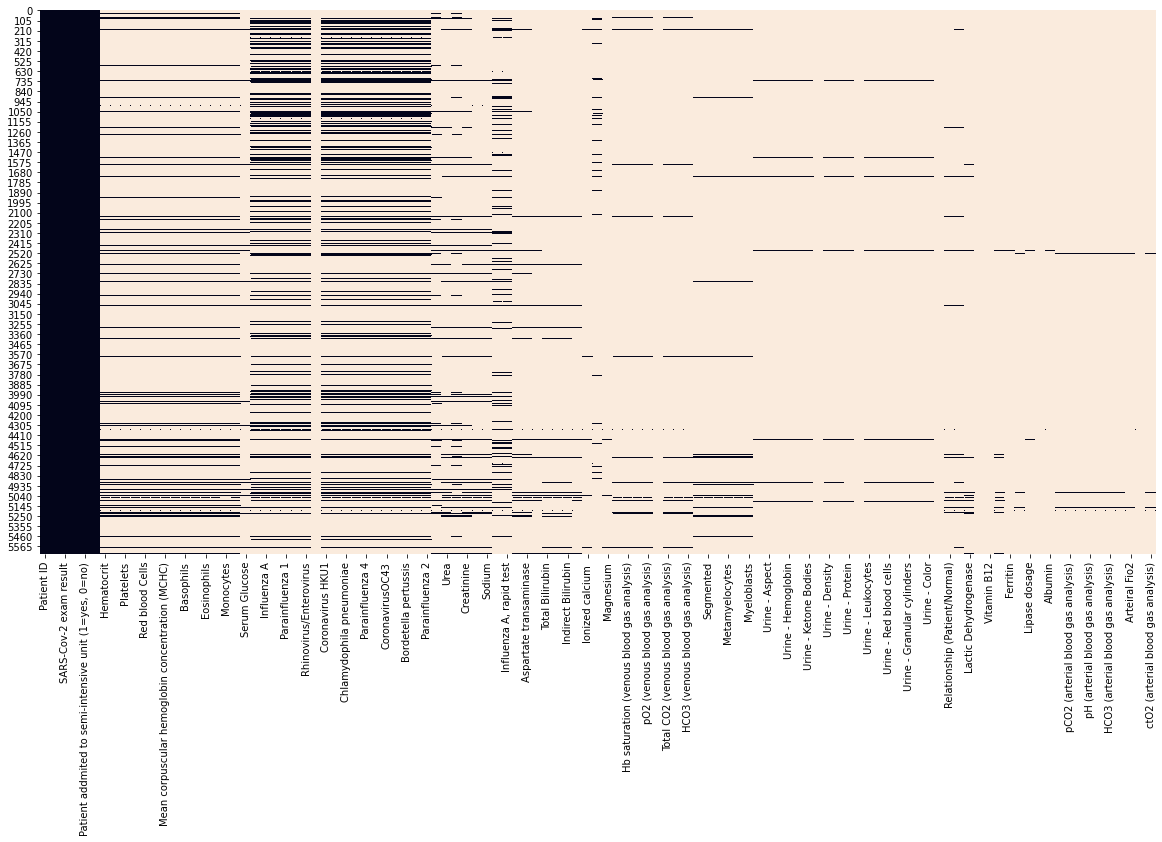

In [13]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(20,10) )
sns.heatmap(data.isnull(), cbar =False)

In [14]:
# Nombre total de valeurs manquantes
print(data.isnull().sum())
print("\nNombre total de valeurs manquantes : ",data.isnull().sum().sum())
print("\nPourcentage " + str(data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100)+"%" )

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

Nombre total de valeurs manquantes :  551682

Pourcentage 88.06003026414082%


In [15]:
# Pourcentage des valeurs manquantes par variable
pd.set_option("display.max_row",111)
(data.isna().sum()/data.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [16]:
# Eliminer les colonnes inutiles
data=data.loc[:, data.isna().sum()/data.shape[0] <.9 ] # ou data[  data.columns[data.isna().sum()/data.shape[0] < .9]  ]
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


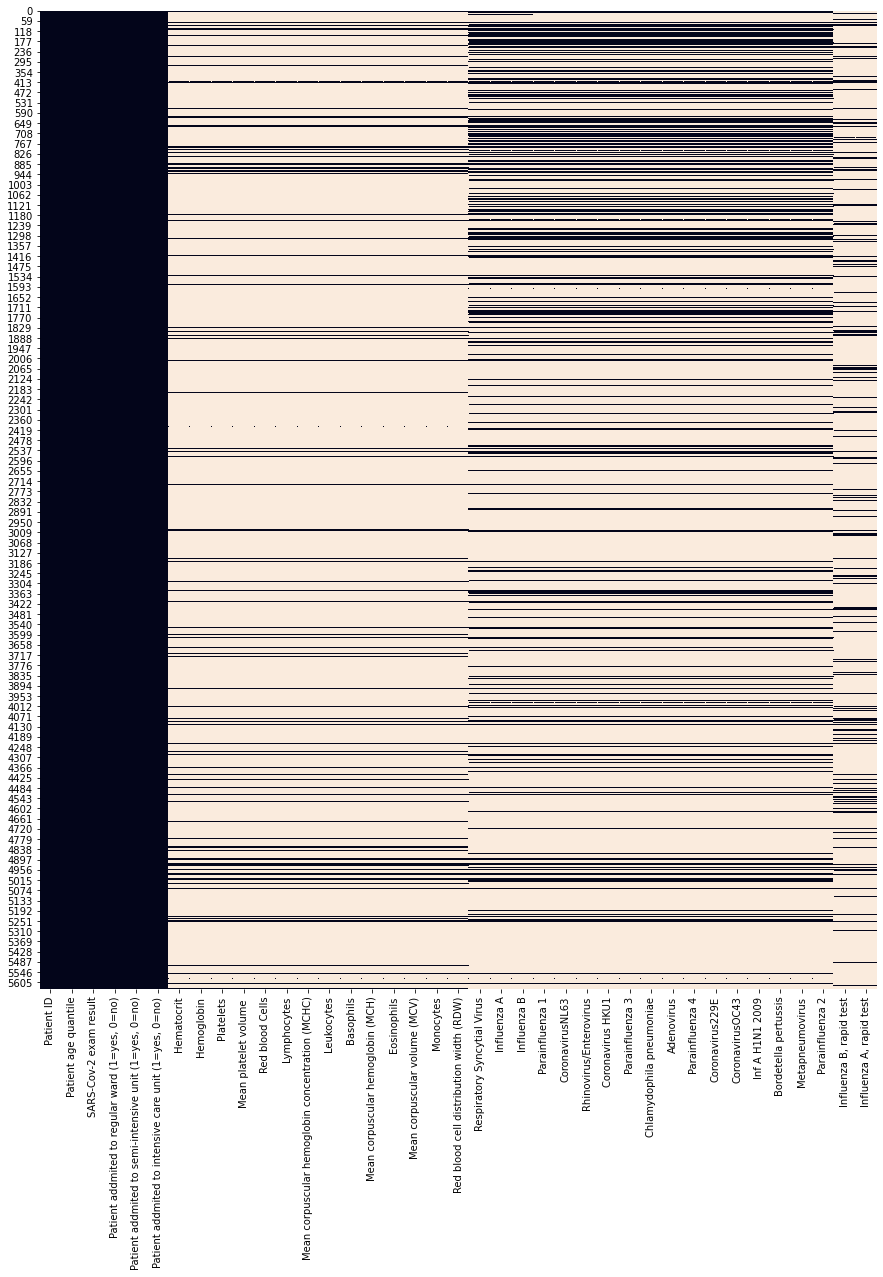

In [17]:
# Visualiser la nouvelle base de données
plt.figure(figsize=(15,18) )
sns.heatmap(data.isnull(), cbar=False)

In [18]:
#On voit que chacun de ces patients a un identifiant.   
print( (data['Patient ID'].value_counts() == 1).sum() == data.shape[0] )
# On constate que chacun de ces identifiants ne se repète pas. Donc, on peut effacer cette variable.
data = data.drop('Patient ID', axis=1)
data.head()

True


,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [19]:
# Analyser la variable target
print(data['SARS-Cov-2 exam result'].value_counts())
data['SARS-Cov-2 exam result'].value_counts()/data.shape[0]*100

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


negative    90.113395
positive     9.886605
Name: SARS-Cov-2 exam result, dtype: float64

# Data Exploratory (seconde partie) 
- analyser la nouvelle base de données

## Analyse de forme:

- nombre de lignes et colonnes: 5644 lignes et 38 colonnes
- types de variable après analyse : 14 quantitatives et 24 qualitatives

## Analyse de fond :

### Analyse univariée

- Variables quantitatives :
  - Elles sont centrées en zéro sauf *Basophils* et *Eosinophils* qui sont asymétriques. Ceci nous penser à une transformation des données mais nous ne connaitrons la réponse par manque d'information sur ces données. 

- Variables qualitatives :
  - elles sont divisées en deux types (objet et int)

  - 3 variables de type int (*Patient addmited to regular ward (1=yes, 0=no),	Patient addmited to semi-intensive unit (1=yes, 0=no),	Patient addmited to intensive care unit (1=yes, 0=no) Patient addmited*):
    - la proportion des classes de chaque variable est inégale
    - il n'y a pas de valeurs manquantes
    - très peu de personnes sont hospitalisées

  - variable target: il n'y a pas de valeur manquante. Elle se divise en deux groupe : 
    - negative: 5086 (~ 90.1%)
    - positive: 558 (~ 9.9%)

  - variable *Patient age quantile* : les valeurs sont entre 0 et 19 mais on ne sait pas s'il s'agit des années. Peut-être il y a eu une transformation des données. Pour la suite de notre étude, cette variable ne sera prise en compte.

  - la disproportion extrême de groupes est présente dans toutes les variables sauf en *Parainfluenza 2*  qui ne continent qu'un seul type de valeur *non_detected* (cette dernière sera éliminée plus tard). Si nous nous centrons , par exemple, sur la variable *Influenza B* qui se divise en deux classes detected et non detected avec une proportion de 5 et 94% respectivement (clairement l'écart est énorme). Ce phénomène est également caracterisées dans les autres variables. Dans ce sens, afin de faire une analyse sur ce genre de données, ça va être dificile, il va falloir peut-être éliminer certaines variables.

  - la variable *Rhinovirus/Enterovirus* contient 28 % de valeurs libéllées detected et 72% de valeurs non detected. Donc, on puorra garder cette variable car l'écart n'est pas aussi grand que pour *Influenza B* par exemple.

  - En analysant les données manquantes des variables de la nouvelle base de données, nous constatons qu'on peut diviser les features en deux groupes. D'une part, le premier groupe contiendra les maladies virales (plus de 86% des donnnées manquantes) et d'autre part, le deuxième groupe contiendra les caractéristiques d'un bilan sanguin (entre 76% et 86% des valeurs manquantes). De plus, il se trouve que les features du deuxième groupe sont quantitatives et les features du premier groupe sont qualitatives. C'est une découverte surprenante (on se demande pourquoi il y a un tel lien). Aussi, les patients ayant des valeurs manquantes pour une variable virale (au 99%) l'ont aussi pour l'ensemble des variables virales (idem pour les variables sanguines). Ceci vous pouvez le voir sur le graphique, ci-dessous, fait à l'aide de seaborn.  
- valeurs manquantes: si on exclu toutes les patients ayant au moins une valeur manquante, notre base de données contiendrai uniquement 99 patients.

### Analyse bivariée
- la variable cible et variables quantitatives (sang):
  - les variables dont la distribution de chacune des classes sont similaires : *Hematocrit*, *Hemoglobin*, *Red blood cell* (2), *Mean corpuscular volume* (2), *Mean corpuscular hemoglobin*, *Lymphocytes*.
  - les variables dont la distribution de chacune des classes sont différentes sont : *Monocytes*, *Eosinophils*, *Basophils*, *Leukocytes*, *Mean platelet volume*, *Platelets*.
- variable cible et variables qualitatives (maladies):
  - Presque tous les patients (au 90%) non atteints d'une maladie virale, autre que le Covid-19, sont testés négative au coronavirus. La seule variable qui ne donne pas le même resulat est *Rhinovirus/Enterovirus* car les patients n'ayant pas attraper cette maladie sont approximativement trois fois plus nombreux que ceux atteints de cette maladie.

- Certaines variables sanguines sont très corrélées:
  - corr(Hematocrit, Hemoglobin) = 0.968447
  - corr(Red blood Cells, Hematocrit) = 0.872987
  - corr(Red blood Cells, Hemoglobin) = 0.841420
  - corr(Mean corpuscular volume (MCV),	Mean corpuscular hemoglobin (MCH)	) = 0.895277	

- Nous avons créer une nouvelle variable *maladie* qui indique si un patient est atteint d'une maladie quelconque dont le covid ne fait pas partie. Ensuite nous l'avons comparé avec les variables sanguines et les resulats obtenus sont très différents de la variable cible(covid-19):
 - les variables dont la distribution de chacune des classes sont similaires : *Lymphocytes*
 - les variables dont la distribution de chacune des classes sont différentes sont : tous les autres

- A partir de trois variables concernant l'hospitalisation des patients, nous avons créer une nouvelle variable qualitative *hospitalisation* dont ses classes sont : * non admis, survaillance, et soins semi-intensives et soins intensives*. Nous constatons que le taux de Leukocytes de patients admis en soin semi-intesives et intensives est différent des patients non admis et en surveillance. 

- test de Student pour la comparaison de deux populations :
  - H0: les moyennes de deux populations (patients testés positives et négatives) sont significativement égales
  - Les variables qui satisfassent cette hypothèse H0 sont: *Platelets, Mean pletelet volume, Red Blood Cells, Leukocytes, Eosinophils, Monocytes*
  - Mais ces variables peuvent changer car nous avons utilisé un tirage aléatoire de l'échantillon plus grand (patients négatives) pour pouvoir appliquer ce test.

In [20]:
# Analyse de la nouvelle base de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient age quantile                                   5644 non-null   int64  
 1   SARS-Cov-2 exam result                                 5644 non-null   object 
 2   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 4   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 5   Hematocrit                                             603 non-null    float64
 6   Hemoglobin                                             603 non-null    float64
 7   Platelets                                              602 non-null    float64
 8   Mean platelet volume                            

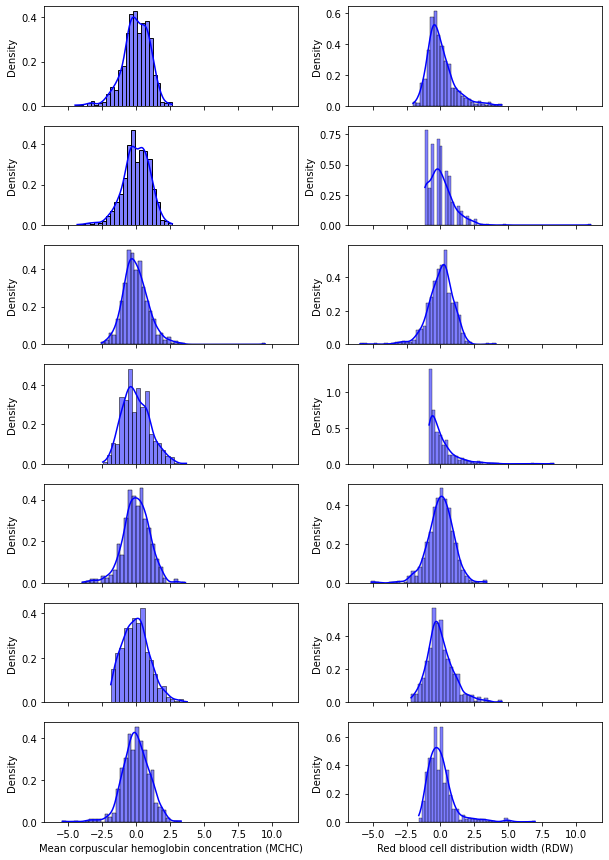

In [21]:
# Histogrames de toutes les variables quantitatives
f, axes = plt.subplots(7, 2, figsize=(10, 15), sharex=True)
a= 0
for i in data.columns[data.dtypes== float]:
  if a <= 6:
    sns.histplot(data.loc[:,i], stat="density", kde=True, color="b", ax=axes[a,0]) #.set_title(str(i))
  else:
   sns.histplot(data.loc[:,i], stat="density", kde=True, color="b", ax=axes[a-7,1]) #.set_title(str(i))
  a= a+1
# on ne distingue pas bien les images. Il va falloir les afficher un par un.

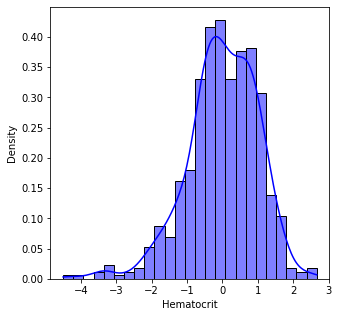

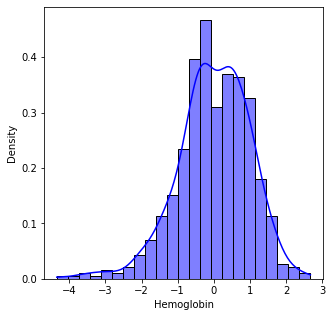

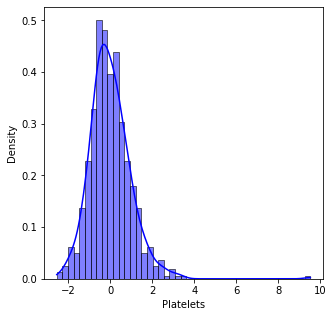

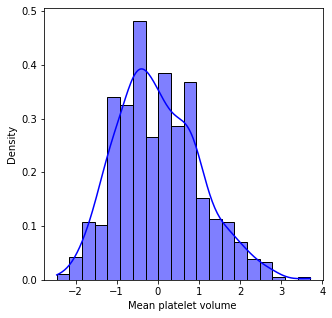

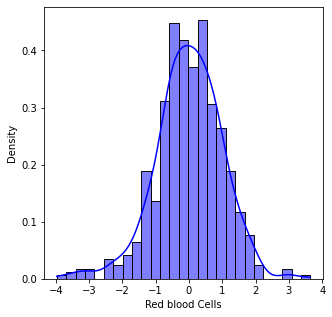

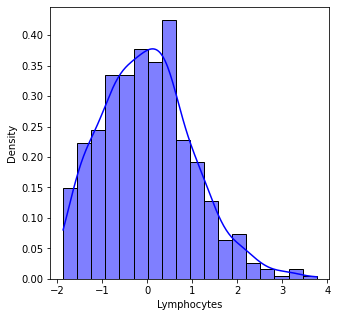

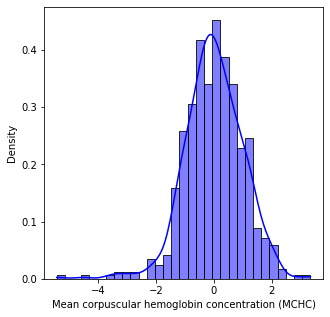

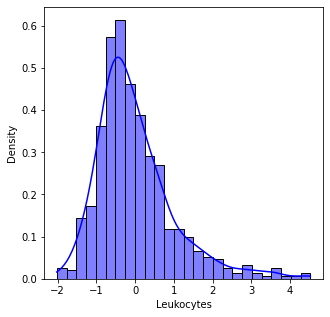

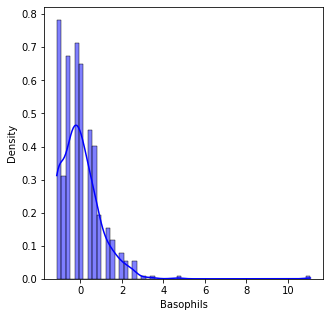

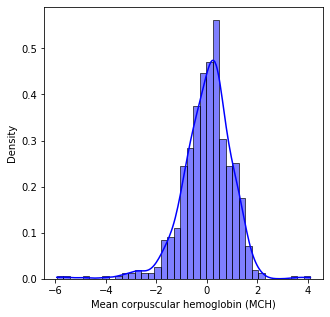

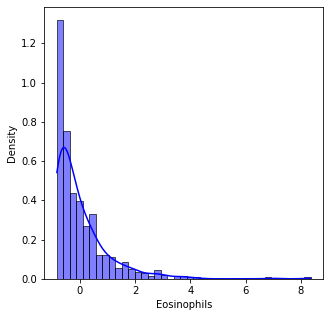

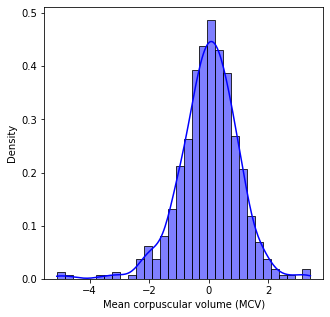

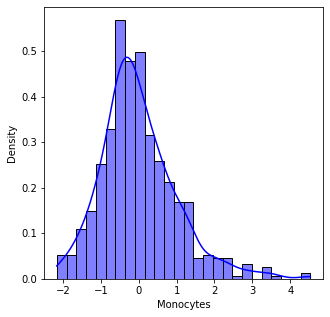

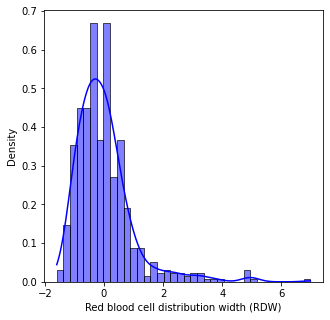

In [22]:
# Histogrames de toutes les variables quantitatives (meilleure visualisation)
for i in data.columns[data.dtypes== float]:
    plt.figure(figsize=(5,5) )
    sns.histplot(data.loc[:,i], stat="density", kde=True, color="b") #.set_title(str(i))

count    5644.000000
mean        9.318391
std         5.777903
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        19.000000
Name: Patient age quantile, dtype: float64

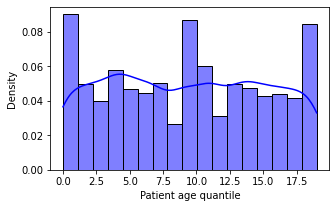

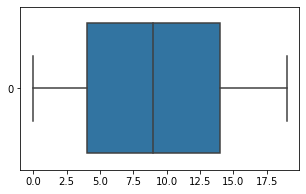

In [23]:
# Variable qualitative "Patient age quantile"
plt.figure(figsize=(5,3))
sns.histplot(data['Patient age quantile'], stat="density", kde=True, color="b")

plt.figure(figsize=(5,3))
sns.boxplot(data =data['Patient age quantile'], orient= "h")

data['Patient age quantile'].describe()


negative    90.113395
positive     9.886605
Name: SARS-Cov-2 exam result, dtype: float64


NaN             76.009922
not_detected    23.068746
detected         0.921332
Name: Respiratory Syncytial Virus, dtype: float64


NaN             76.009922
not_detected    23.671155
detected         0.318923
Name: Influenza A, dtype: float64


NaN             76.009922
not_detected    22.625797
detected         1.364281
Name: Influenza B, dtype: float64


NaN             76.045358
not_detected    23.901488
detected         0.053154
Name: Parainfluenza 1, dtype: float64


NaN             76.045358
not_detected    23.157335
detected         0.797307
Name: CoronavirusNL63, dtype: float64


NaN             76.045358
not_detected    17.239546
detected         6.715096
Name: Rhinovirus/Enterovirus, dtype: float64


NaN             76.045358
not_detected    23.600283
detected         0.354359
Name: Coronavirus HKU1, dtype: float64


NaN             76.045358
not_detected    23.777463
detected         0.

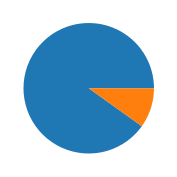

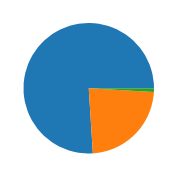

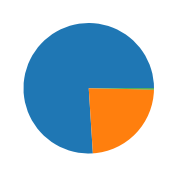

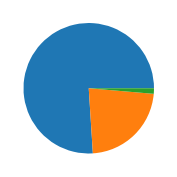

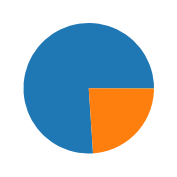

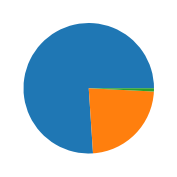

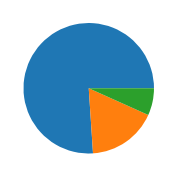

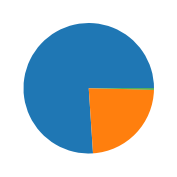

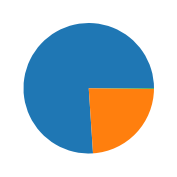

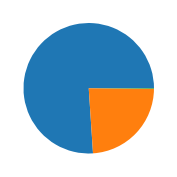

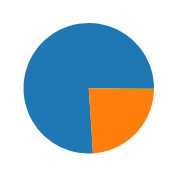

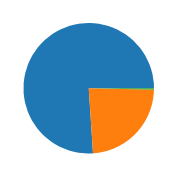

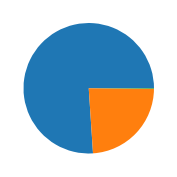

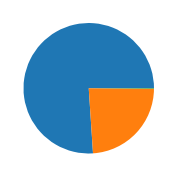

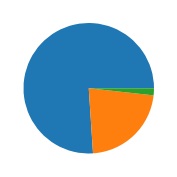

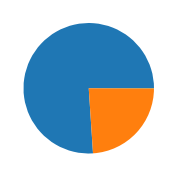

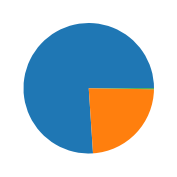

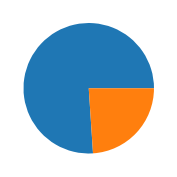

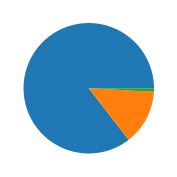

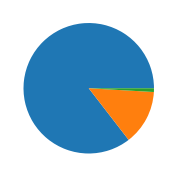

In [24]:
# Diagramme circulaire des variables qualitatives (de type objet)
# Partie A : on prend en compte les valeurs manquantes

for i in data.columns[data.dtypes== object]:
  print(data.loc[:,i].value_counts(dropna = False, normalize=True)*100 ); print("\n")
  plt.figure(figsize=(5,3))
  plt.pie(data.loc[:,i].value_counts(dropna = False, normalize=True) )



negative    90.113395
positive     9.886605
Name: SARS-Cov-2 exam result, dtype: float64


not_detected    96.159527
detected         3.840473
Name: Respiratory Syncytial Virus, dtype: float64


not_detected    98.670606
detected         1.329394
Name: Influenza A, dtype: float64


not_detected    94.313146
detected         5.686854
Name: Influenza B, dtype: float64


not_detected    99.778107
detected         0.221893
Name: Parainfluenza 1, dtype: float64


not_detected    96.671598
detected         3.328402
Name: CoronavirusNL63, dtype: float64


not_detected    71.967456
detected        28.032544
Name: Rhinovirus/Enterovirus, dtype: float64


not_detected    98.52071
detected         1.47929
Name: Coronavirus HKU1, dtype: float64


not_detected    99.260355
detected         0.739645
Name: Parainfluenza 3, dtype: float64


not_detected    99.33432
detected         0.66568
Name: Chlamydophila pneumoniae, dtype: float64


not_detected    99.038462
detected         0.961538
Name: Adenov

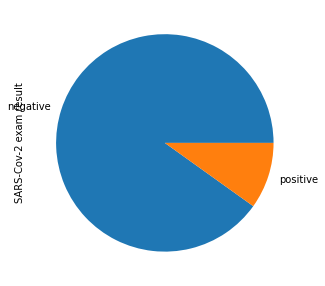

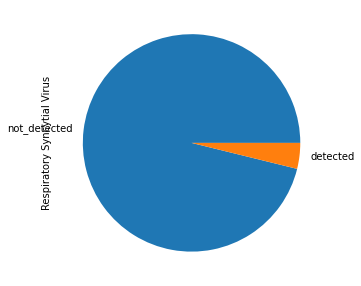

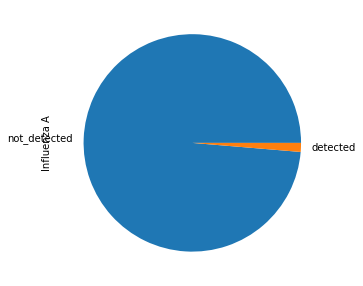

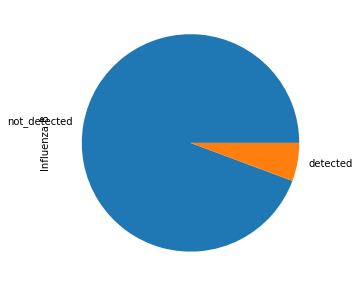

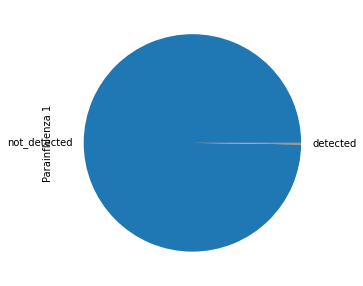

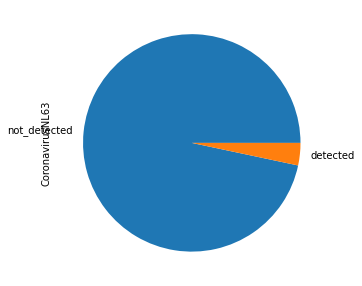

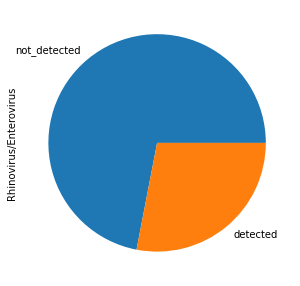

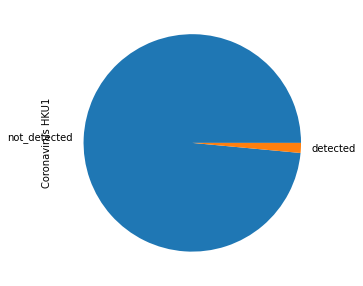

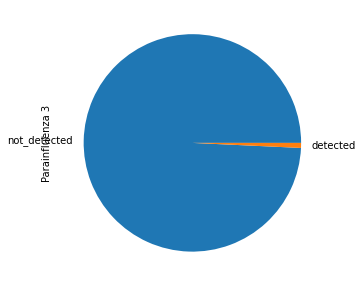

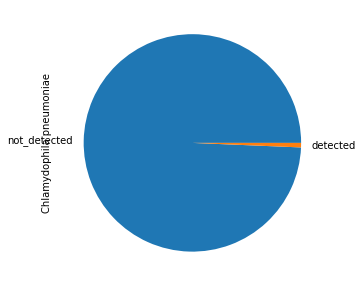

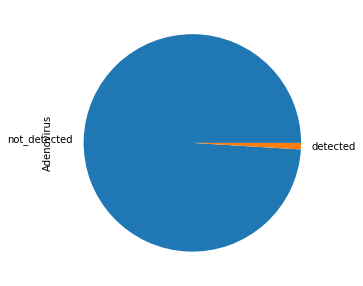

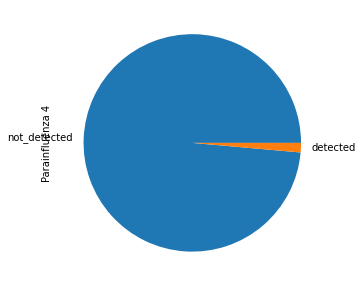

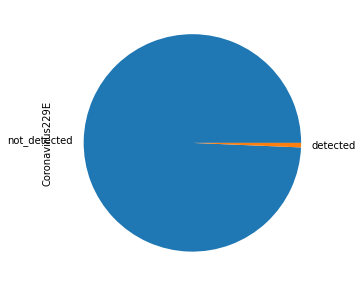

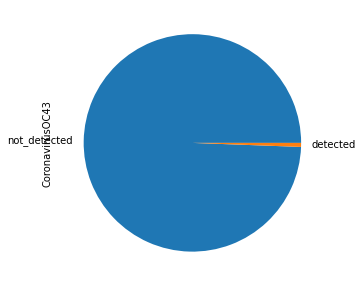

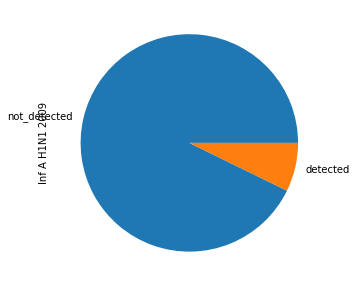

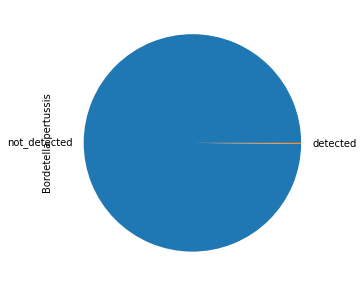

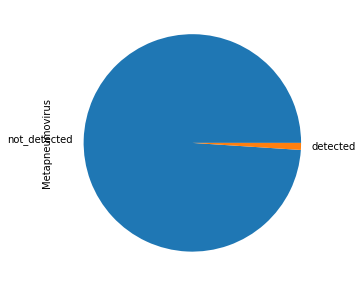

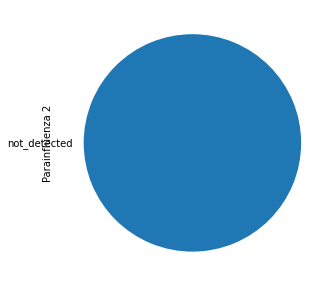

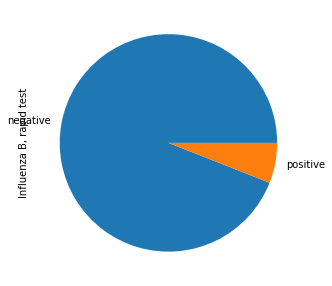

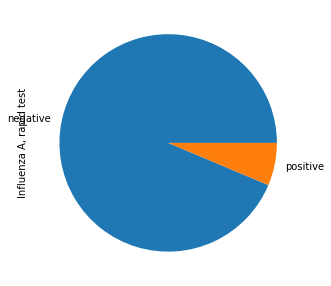

In [25]:
# Diagramme circulaire des variables qualitatives (de type objet)
# Partie B : on ne prend pas en compte les valeurs manquantes
for i in data.columns[data.dtypes== object]:
  #print(data.loc[:,i].value_counts(normalize=True)*100 ); print("\n")
  #print(data.loc[:,i].value_counts(dropna =False) ); print("\n")
  #print(data.loc[:,i].value_counts(dropna = False, normalize=True)*100 ); print("\n")
  print(data.loc[:,i].value_counts( normalize=True)*100 ); print("\n")
  plt.figure(figsize=(5,5))
  data.loc[:,i].value_counts().plot.pie(subplots=True)



0    98.600283
1     1.399717
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: float64


0    99.114103
1     0.885897
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: float64


0    99.273565
1     0.726435
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: float64




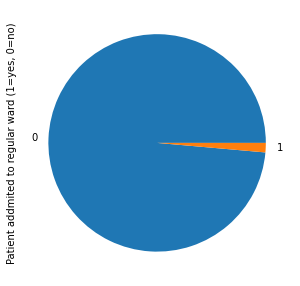

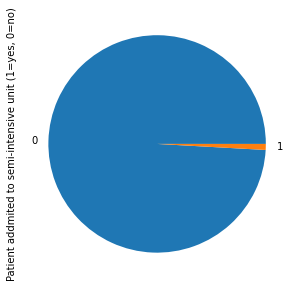

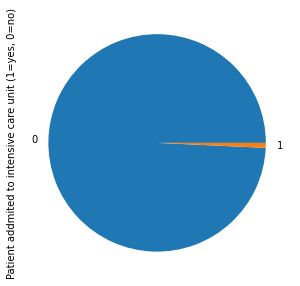

In [26]:
# Diagramme circulaire des variables qualitatives (de type int)

for i in data.columns[data.dtypes== int][1:]:
  #print(data.loc[:,i].value_counts(normalize=True)*100 ); print("\n")
  #print(data.loc[:,i].value_counts(dropna =False) ); print("\n")
  #print(data.loc[:,i].value_counts(dropna = False, normalize=True)*100 ); print("\n")
  print(data.loc[:,i].value_counts( normalize=True)*100 ); print("\n")
  plt.figure(figsize=(5,5))
  data.loc[:,i].value_counts().plot.pie(subplots=True)


In [27]:
# Afficher le pourcentage des valeurs manquantes de chaque variable
(data.isna().sum()/data.shape[0]).sort_values()*100

Patient age quantile                                      0.000000
SARS-Cov-2 exam result                                    0.000000
Patient addmited to regular ward (1=yes, 0=no)            0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.000000
Patient addmited to intensive care unit (1=yes, 0=no)     0.000000
Respiratory Syncytial Virus                              76.009922
Influenza A                                              76.009922
Influenza B                                              76.009922
Inf A H1N1 2009                                          76.045358
CoronavirusOC43                                          76.045358
Metapneumovirus                                          76.045358
Parainfluenza 4                                          76.045358
Adenovirus                                               76.045358
Chlamydophila pneumoniae                                 76.045358
Parainfluenza 3                                          76.04

In [28]:
# Effacer la variable Parainfluenza 2 
data = data[data.columns[data.columns != 'Parainfluenza 2']]

# Diviser les variables en deux groupes (les maladies et les indicateurs d'analyse de sang)
val = (data.isna().sum()/data.shape[0])*100
maladie_col = data.columns[(val > 76) & (val < 86)]
sang_col = data.columns[val > 86]
print("maladies : "+str(maladie_col))
print("sang : "+ str(sang_col))


maladies : Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Influenza B, rapid test', 'Influenza A, rapid test'],
      dtype='object')
sang : Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')


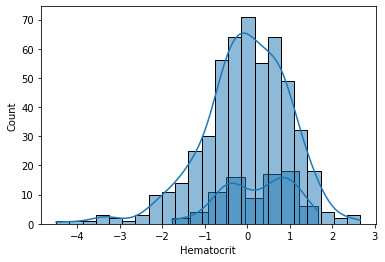

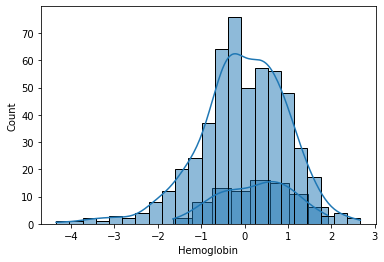

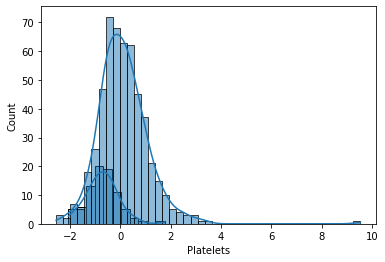

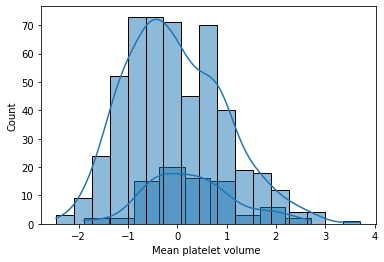

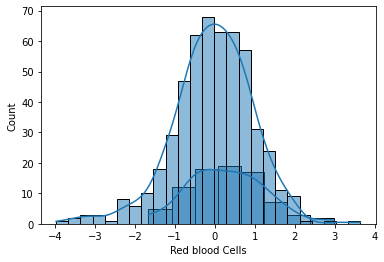

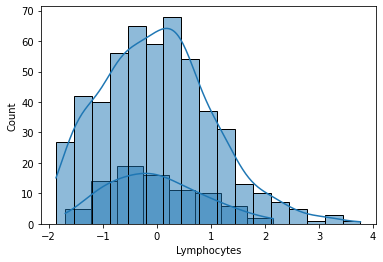

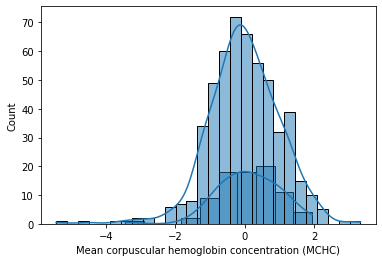

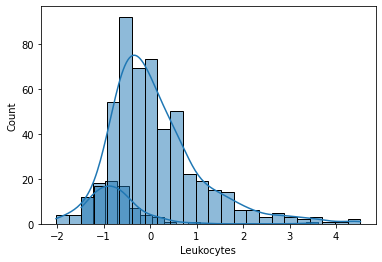

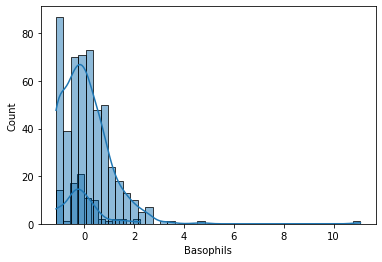

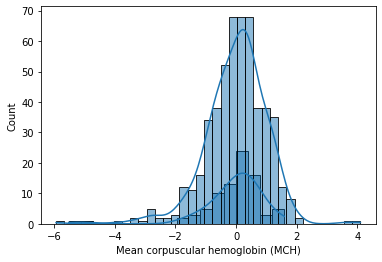

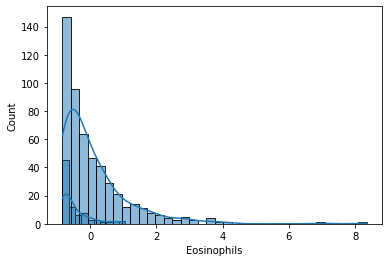

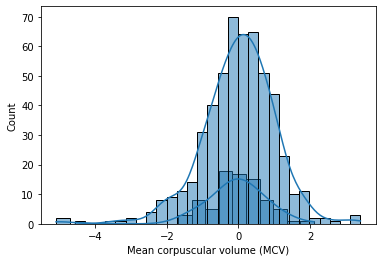

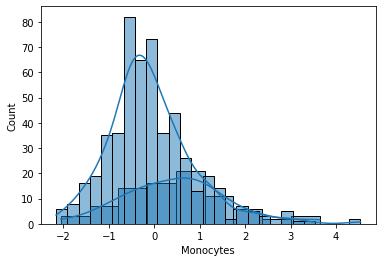

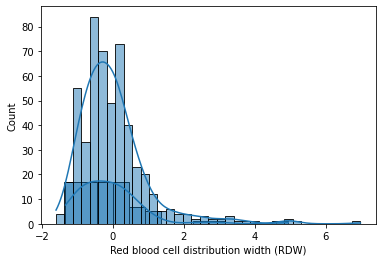

In [29]:
# 
for i in sang_col:
  plt.figure()
  sns.histplot(data.loc[data["SARS-Cov-2 exam result"]=="positive", i ],kde= True )
  sns.histplot(data.loc[data["SARS-Cov-2 exam result"]=="negative", i ], kde =True  )


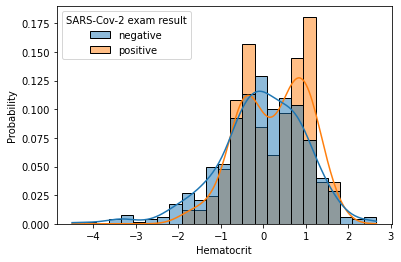

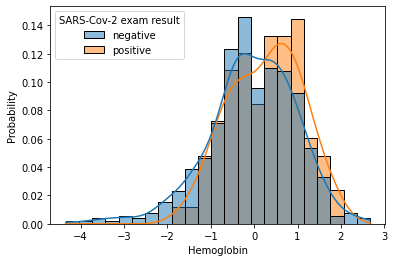

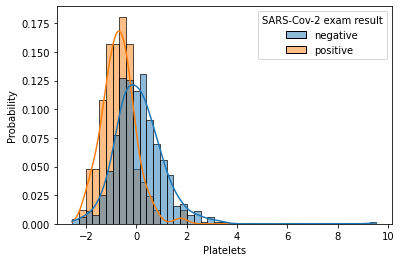

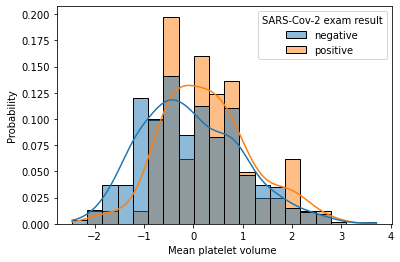

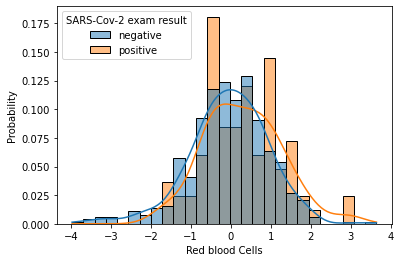

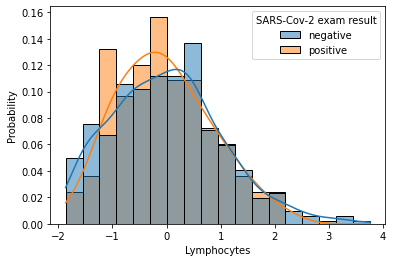

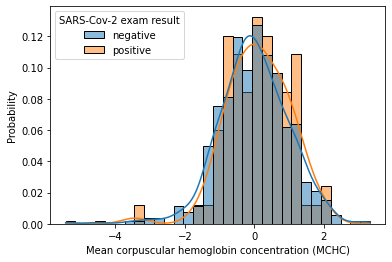

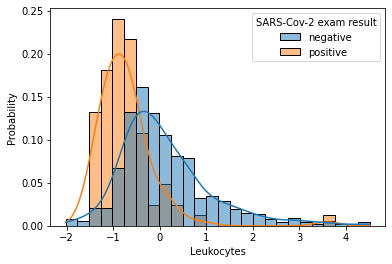

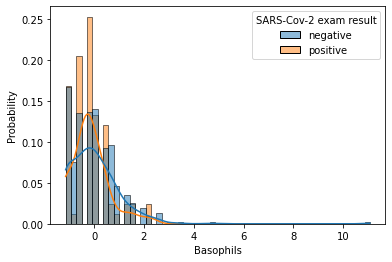

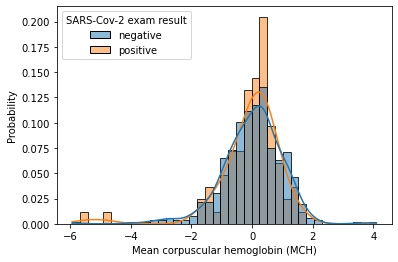

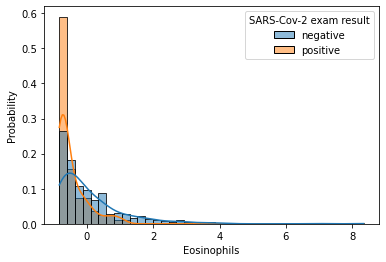

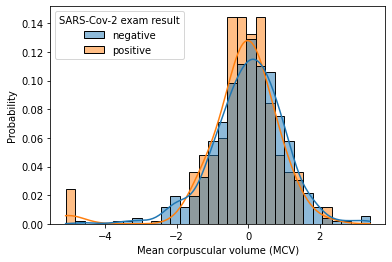

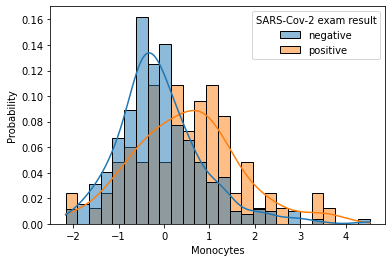

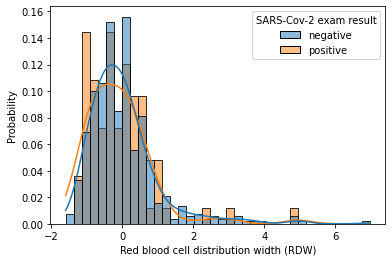

In [30]:
# Analyse bivariée (variable cible et variables quantitatives (sang_col) )
for i in sang_col:
  plt.figure() 
  sns.histplot(data = data,x= i , hue= "SARS-Cov-2 exam result",stat='probability', kde=True, common_norm=False  ) 

In [31]:
# Variable cible et variables qualitatives
for i in maladie_col: 
  print( pd.crosstab( data["SARS-Cov-2 exam result"], data[str(i)], margins=True, normalize=True )*100 ); print("\n")

Respiratory Syncytial Virus  detected  not_detected         All
SARS-Cov-2 exam result                                         
negative                     3.840473     87.887740   91.728213
positive                     0.000000      8.271787    8.271787
All                          3.840473     96.159527  100.000000


Influenza A             detected  not_detected         All
SARS-Cov-2 exam result                                    
negative                1.329394     90.398818   91.728213
positive                0.000000      8.271787    8.271787
All                     1.329394     98.670606  100.000000


Influenza B             detected  not_detected         All
SARS-Cov-2 exam result                                    
negative                5.465288     86.262925   91.728213
positive                0.221566      8.050222    8.271787
All                     5.686854     94.313146  100.000000


Parainfluenza 1         detected  not_detected         All
SARS-Cov-2 exam result   

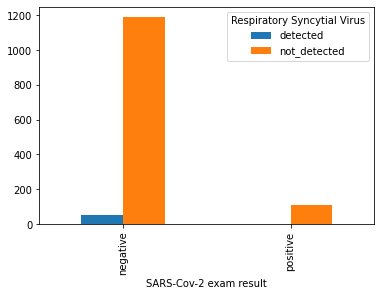

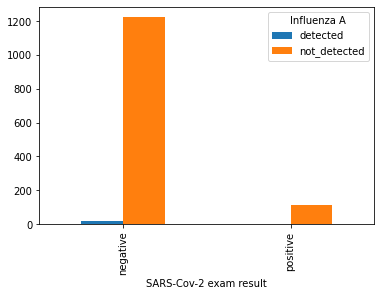

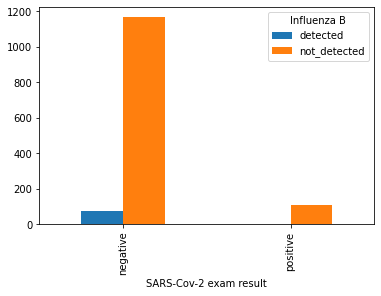

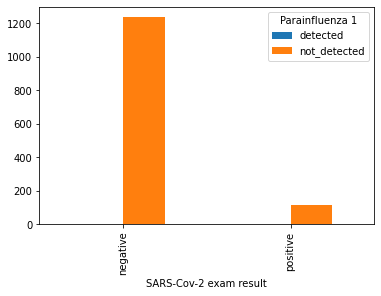

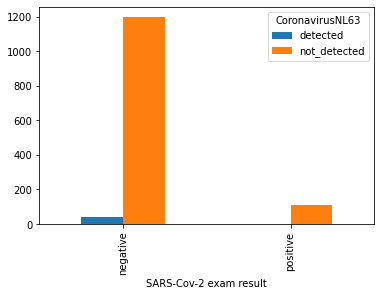

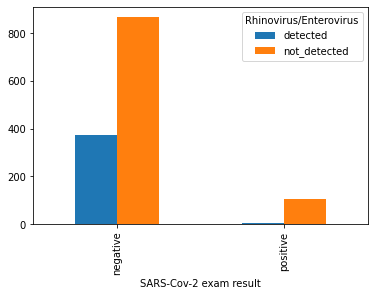

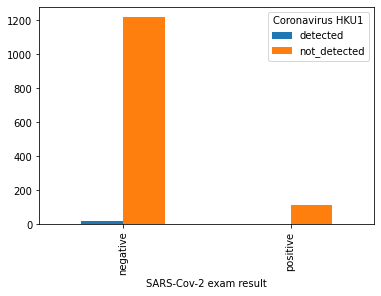

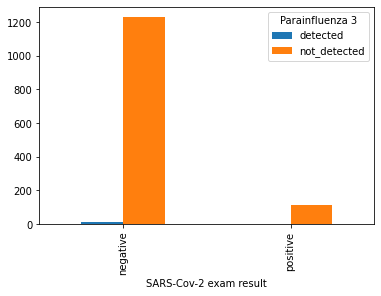

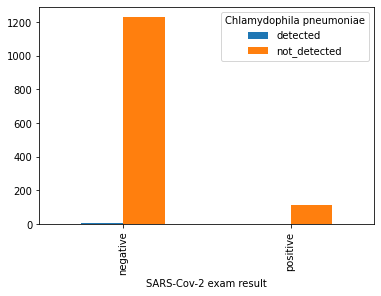

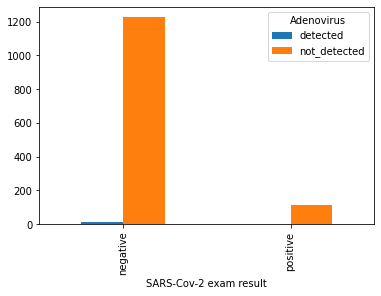

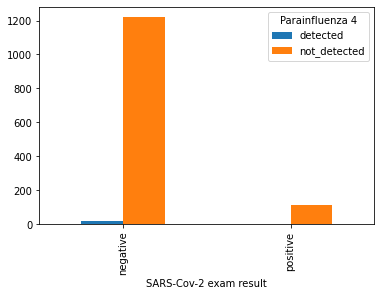

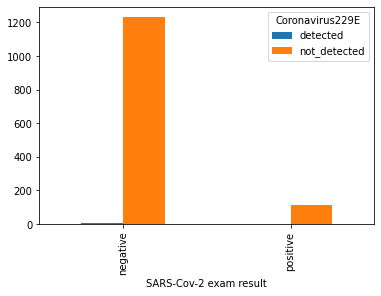

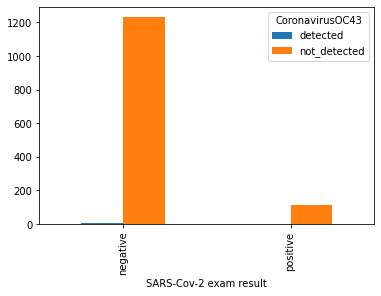

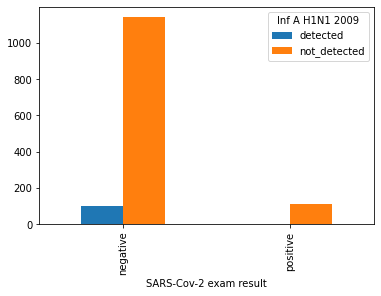

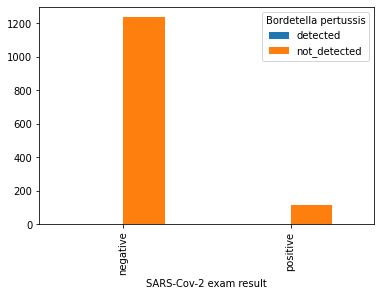

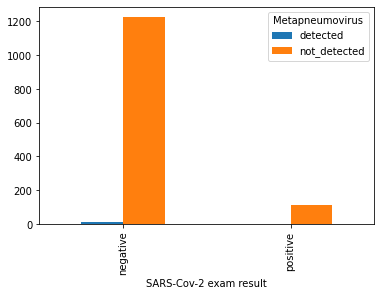

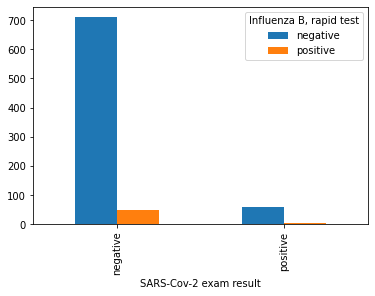

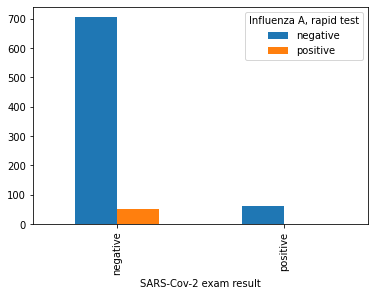

In [32]:
# variable cible et virales (qualitatives)
for i in maladie_col:
  #plt.figure() 
  pd.crosstab( data["SARS-Cov-2 exam result"], data[str(i)] ).plot.bar()




In [33]:
# valeurs manquantes dans les trois variables
print('Patient addmited to regular ward (1=yes, 0=no)  : ' + str( data.iloc[:,2].isna().sum() ) )
print('Patient addmited to semi-intensive unit (1=yes, 0=no) : '+ str( data.iloc[:,3].isna().sum()))
print( 'Patient addmited to intensive care unit (1=yes, 0=no) : '+ str( data.iloc[:,4].isna().sum())+'\n')

#pd.crosstab( data["SARS-Cov-2 exam result"],columns= [data.iloc[:,2],data.iloc[:,3],data.iloc[:,4] ], colnames=['regular ward','semi-intensive','intensive care']  )
print( pd.crosstab( data["SARS-Cov-2 exam result"],columns= data.iloc[:,2]) )
print(pd.crosstab( data["SARS-Cov-2 exam result"],columns= data.iloc[:,3]))
print(pd.crosstab( data["SARS-Cov-2 exam result"],columns= data.iloc[:,4]))

Patient addmited to regular ward (1=yes, 0=no)  : 0
Patient addmited to semi-intensive unit (1=yes, 0=no) : 0
Patient addmited to intensive care unit (1=yes, 0=no) : 0

Patient addmited to regular ward (1=yes, 0=no)     0   1
SARS-Cov-2 exam result                                  
negative                                        5043  43
positive                                         522  36
Patient addmited to semi-intensive unit (1=yes, 0=no)     0   1
SARS-Cov-2 exam result                                         
negative                                               5044  42
positive                                                550   8
Patient addmited to intensive care unit (1=yes, 0=no)     0   1
SARS-Cov-2 exam result                                         
negative                                               5053  33
positive                                                550   8


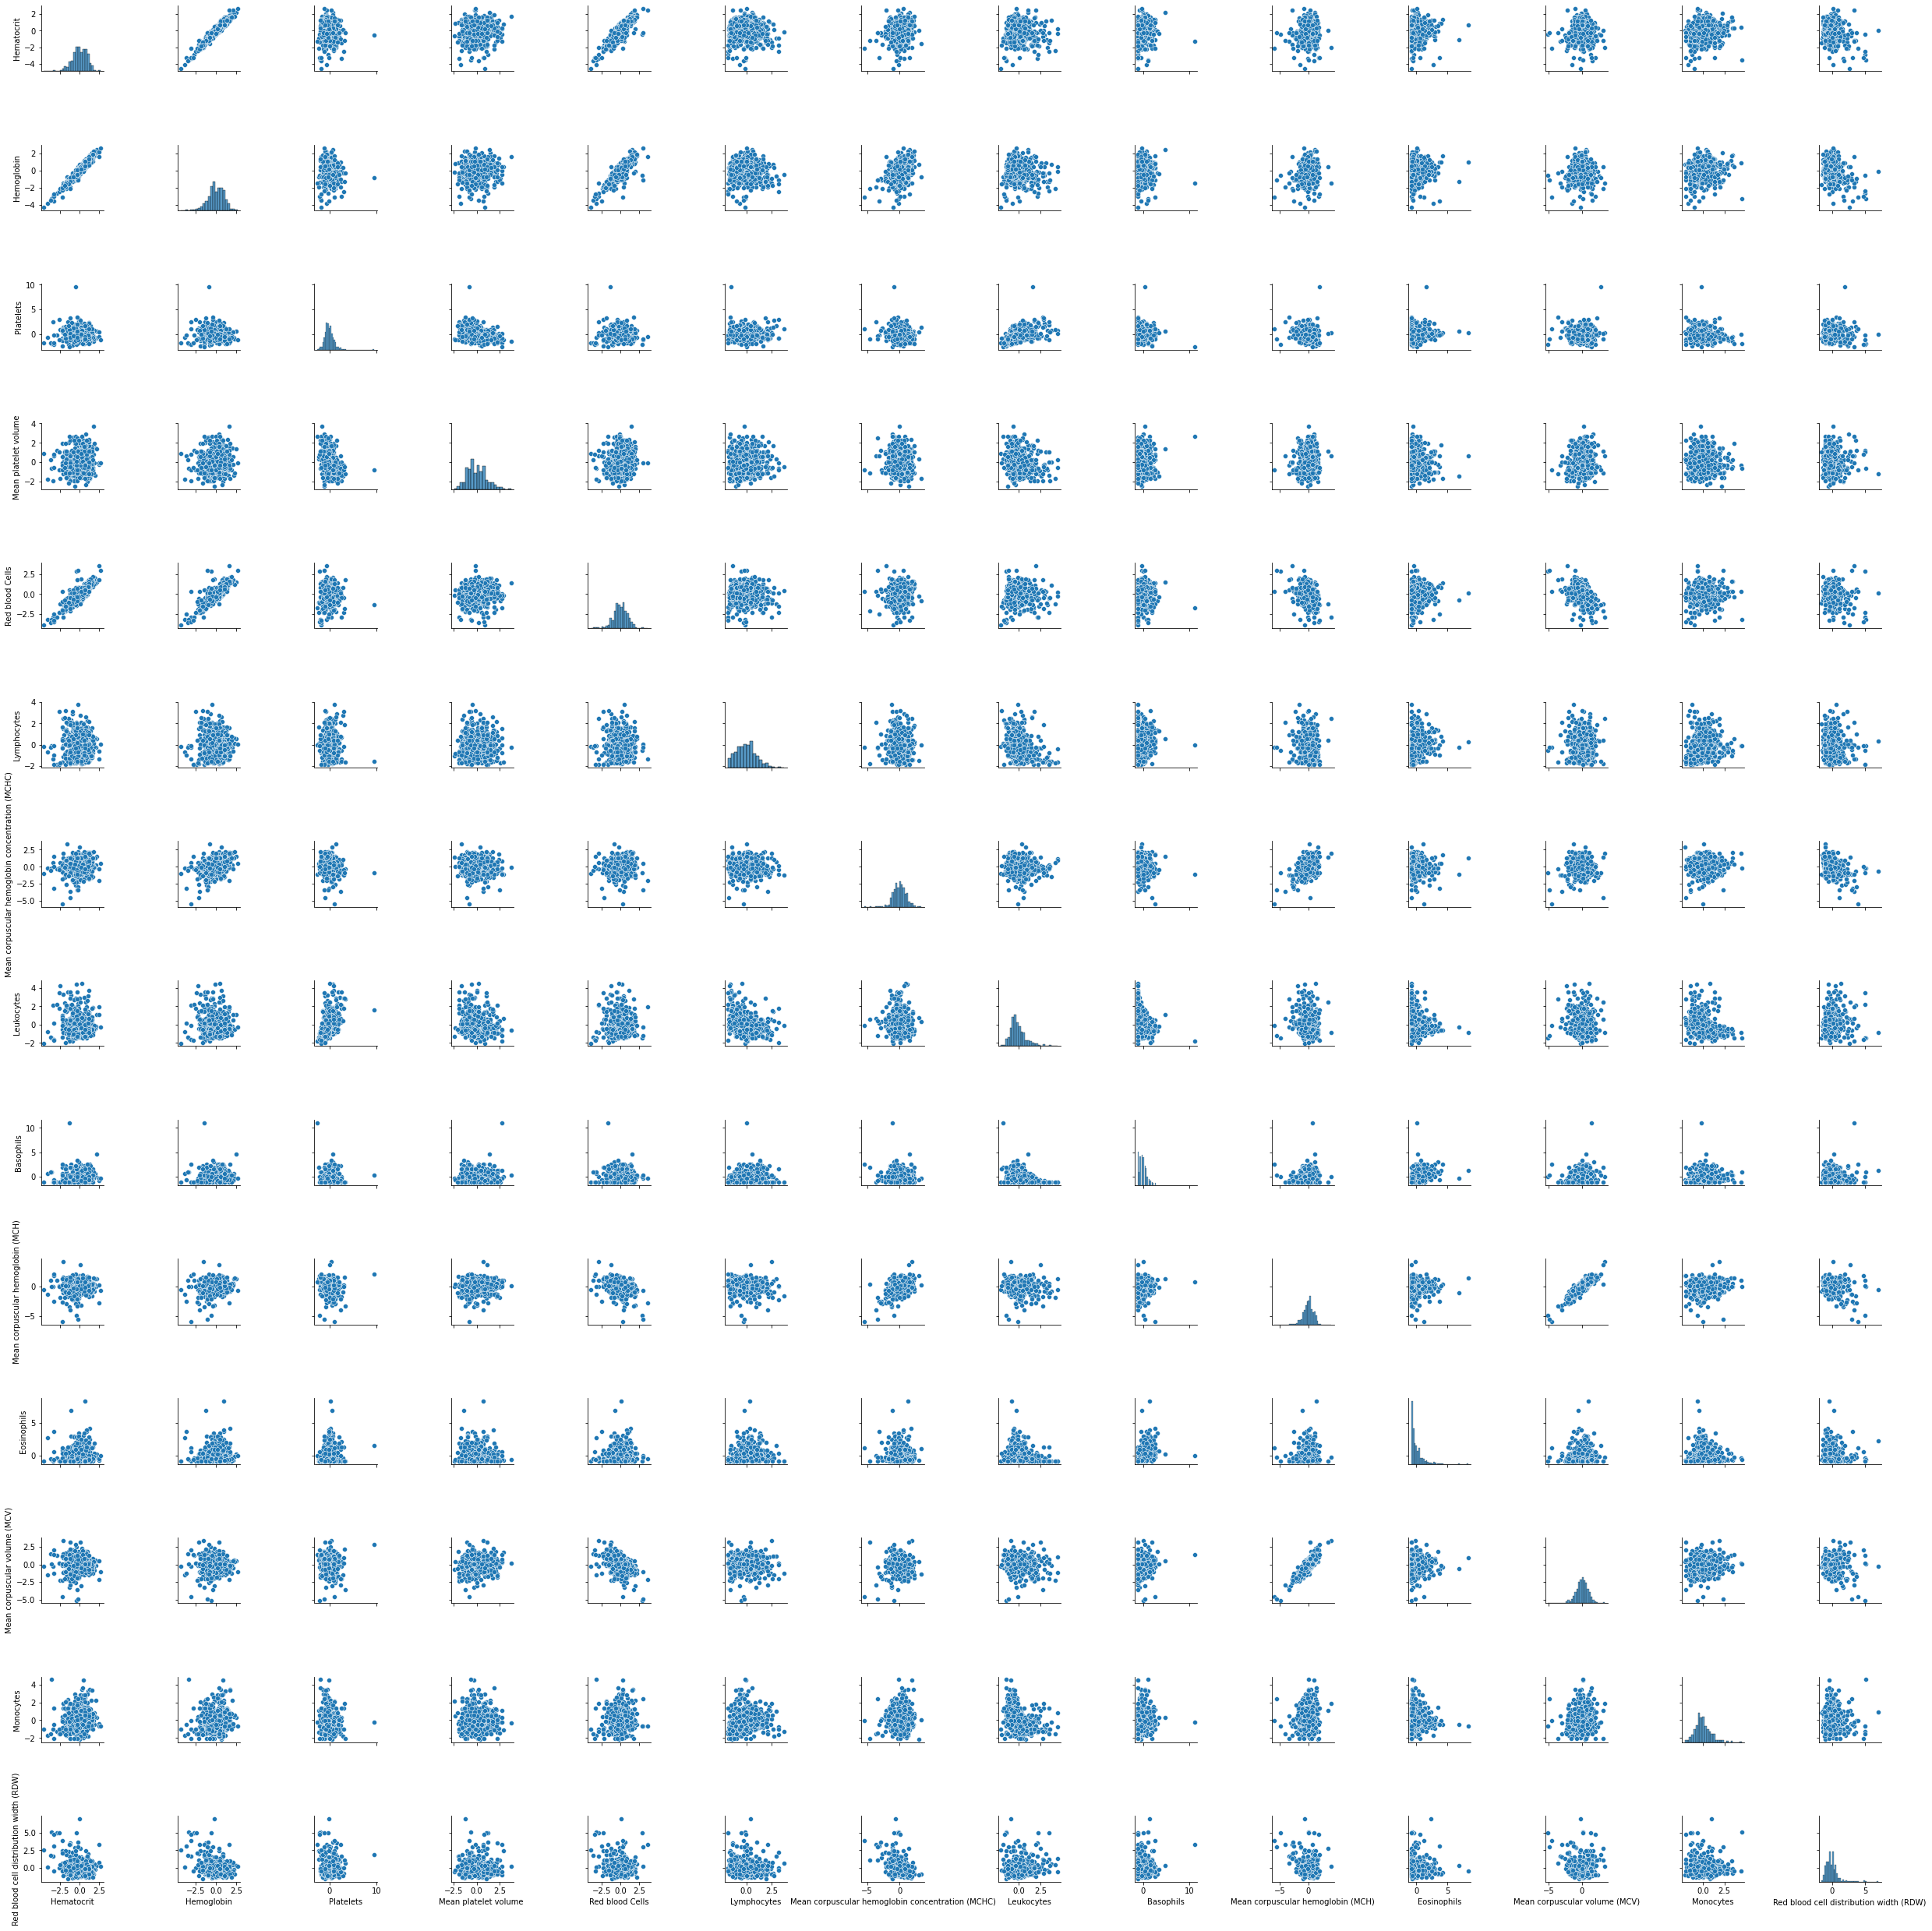

In [34]:
# corrélation entre les varables sanguines (quantitatives)
sns.pairplot(data[sang_col])

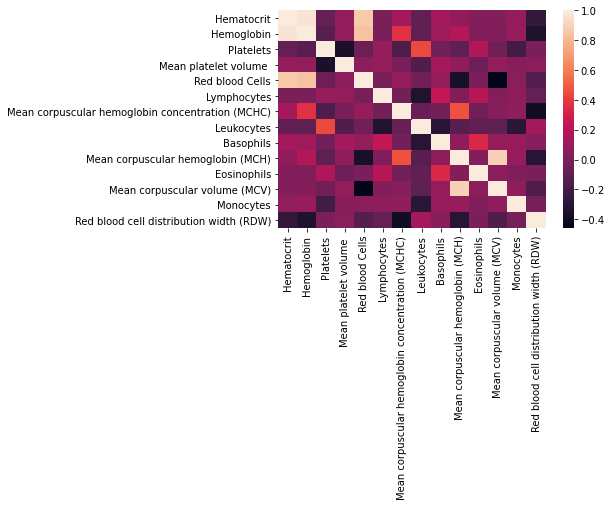

In [35]:
sns.heatmap(data[sang_col].corr())

In [36]:
data[sang_col].corr() 

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
Hematocrit,1.000000,0.968447,-0.082296,0.083580,0.872987,0.002035,0.130771,-0.089937,0.129268,0.075216,0.029781,0.025161,0.082361,-0.264708
Hemoglobin,0.968447,1.000000,-0.120150,0.078816,0.841420,-0.004105,0.371708,-0.102375,0.116389,0.184883,0.018618,0.027679,0.094586,-0.342426
Platelets,-0.082296,-0.120150,1.000000,-0.356332,-0.054561,0.090607,-0.159397,0.443056,-0.025990,-0.101245,0.169453,-0.033844,-0.200660,-0.008222
Mean platelet volume,0.083580,0.078816,-0.356332,1.000000,0.043419,0.079060,-0.004011,-0.154643,0.128630,0.069457,-0.046539,0.078026,0.038380,0.045468
Red blood Cells,0.872987,0.841420,-0.054561,0.043419,1.000000,-0.009843,0.090073,-0.036159,0.079362,-0.367077,-0.004408,-0.458531,0.045172,-0.138071
Lymphocytes,0.002035,-0.004105,0.090607,0.079060,-0.009843,1.000000,-0.027979,-0.330536,0.234675,0.014736,0.199562,0.026927,0.065313,-0.079711
Mean corpuscular hemoglobin concentration (MCHC),0.130771,0.371708,-0.159397,-0.004011,0.090073,-0.027979,1.000000,-0.066209,-0.026059,0.474425,-0.042352,0.035352,0.070070,-0.393550
Leukocytes,-0.089937,-0.102375,0.443056,-0.154643,-0.036159,-0.330536,-0.066209,1.000000,-0.304432,-0.124076,-0.092125,-0.102604,-0.294731,0.128326
Basophils,0.129268,0.116389,-0.025990,0.128630,0.079362,0.234675,-0.026059,-0.304432,1.000000,0.064536,0.334993,0.085057,0.098610,0.038227
Mean corpuscular hemoglobin (MCH),0.075216,0.184883,-0.101245,0.069457,-0.367077,0.014736,0.474425,-0.124076,0.064536,1.000000,0.029756,0.895277,0.092752,-0.300411


In [37]:
data[sang_col].corr()['Hematocrit'].sort_values()

Red blood cell distribution width (RDW)            -0.264708
Leukocytes                                         -0.089937
Platelets                                          -0.082296
Lymphocytes                                         0.002035
Mean corpuscular volume (MCV)                       0.025161
Eosinophils                                         0.029781
Mean corpuscular hemoglobin (MCH)                   0.075216
Monocytes                                           0.082361
Mean platelet volume                                0.083580
Basophils                                           0.129268
Mean corpuscular hemoglobin concentration (MCHC)    0.130771
Red blood Cells                                     0.872987
Hemoglobin                                          0.968447
Hematocrit                                          1.000000
Name: Hematocrit, dtype: float64

In [38]:
print(maladie_col)

pd.crosstab(data['Influenza A'], data['Influenza A, rapid test'], normalize = True)*100
# il existe deux couples de variables qui sont très proches. D'un côté, *Influenza A* et *Influenza A, rapid test* et de l'autre, *Influenza B* et *Influenza B, rapid test*
# Quasi tout le mond

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Influenza B, rapid test', 'Influenza A, rapid test'],
      dtype='object')


"Influenza A, rapid test",negative,positive
Influenza A,,
detected,0.751880,1.503759
not_detected,92.105263,5.639098


In [39]:
pd.crosstab(data['Influenza B'], data['Influenza B, rapid test'], normalize = True)*100


"Influenza B, rapid test",negative,positive
Influenza B,,
detected,6.766917,4.135338
not_detected,87.593985,1.503759


In [40]:
# création d'une nouvelle variable "maladie"

data['malade'] = ((data[maladie_col].iloc[:,0:16]=='not_detected').sum(axis=1)>0)


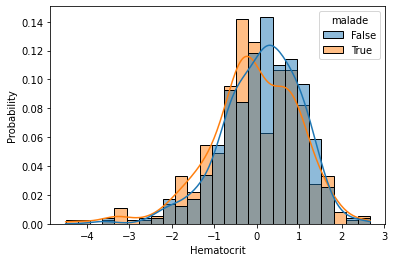

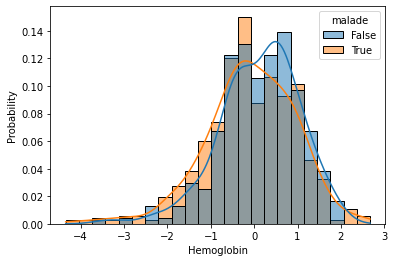

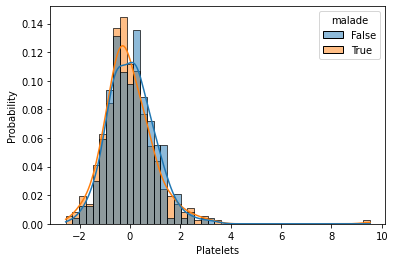

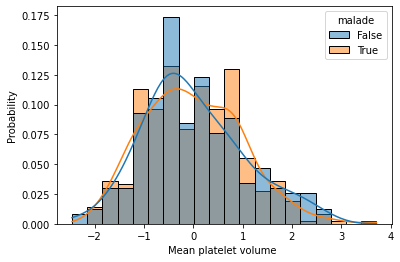

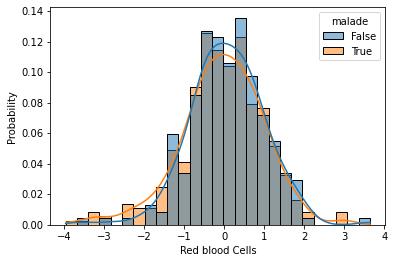

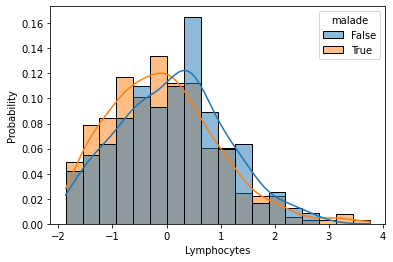

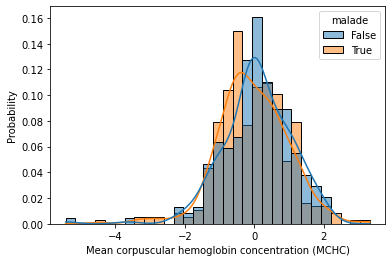

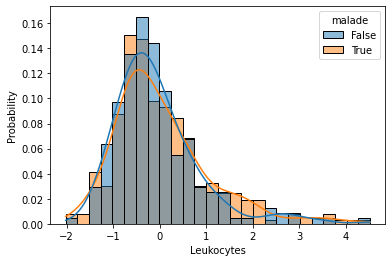

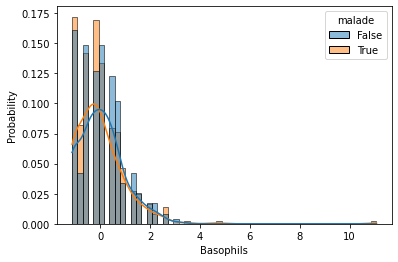

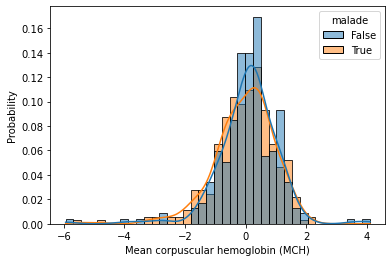

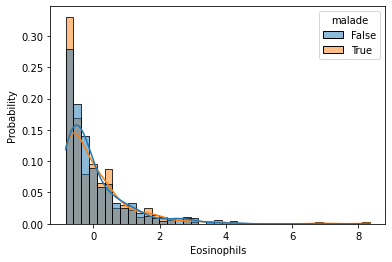

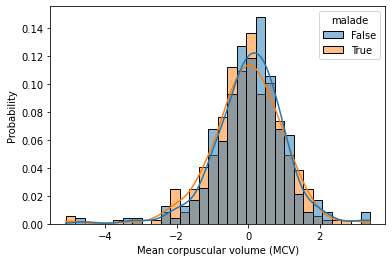

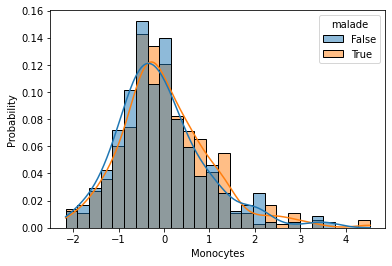

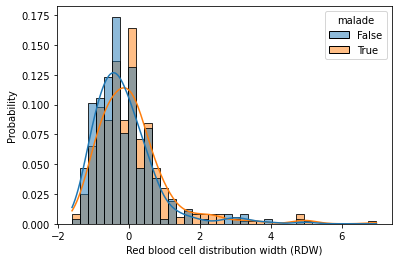

In [41]:
for i in sang_col:
  plt.figure()
  sns.histplot(data = data,x= i , hue= "malade",stat='probability', kde=True, common_norm=False  ) 


In [42]:
# création d'une nouvelle variable hospitalisation et une fonction hospi pour la créer
# tout d'abord, il faut vérifier s'il y a d'erreur dans les trois variables.
print("patient ayant plus qu'une caractéristique : " +str((data.iloc[:,2:5].sum(axis=1) >1).sum() ))


patient ayant plus qu'une caractéristique : 0


In [43]:
# première version
start_time = time.time()

test = data['SARS-Cov-2 exam result'].copy()

test[ data["Patient addmited to regular ward (1=yes, 0=no)"]==1 ] ='surveillance'
test[ data["Patient addmited to semi-intensive unit (1=yes, 0=no)"]==1 ] ='soins semi-intensives'
test[ data["Patient addmited to intensive care unit (1=yes, 0=no)"]==1 ] ='soins intensives'
test[(test != 'surveillance') & (test != 'soins intensives') & (test != 'soins semi-intensives')] = 'non admis'
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.011306047439575195 seconds ---


In [44]:
# seconde version
start_time =time.time()

def hospit(data):
  if data["Patient addmited to regular ward (1=yes, 0=no)"]==1:
    return 'surveillance'
  elif data["Patient addmited to semi-intensive unit (1=yes, 0=no)"]==1:
    return 'soins semi-intensives'
  elif data["Patient addmited to intensive care unit (1=yes, 0=no)"]==1:
    return 'soins intensives'
  else:
    return 'non admis'

start_time =time.time()

data['statut'] = data.iloc[:,2:5].apply(hospit, axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.09846663475036621 seconds ---


In [45]:
# trosième version
start_time =time.time()

def hospit_2(x):
  for i in range(5644) :
    if x.loc[i,"Patient addmited to regular ward (1=yes, 0=no)"]==1:
      test_2[i] = 'surveillance'
    elif x.loc[i,"Patient addmited to semi-intensive unit (1=yes, 0=no)"]==1:
      test_2[i] = 'soins semi-intensives'
    elif x.loc[i,"Patient addmited to intensive care unit (1=yes, 0=no)"]==1:
      test_2[i] = 'soins intensives'
    else:
      return 'non admis'

test_2 = data['SARS-Cov-2 exam result'].copy()
test_2 = hospit_2(data.iloc[:,2:5])
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.0018939971923828125 seconds ---


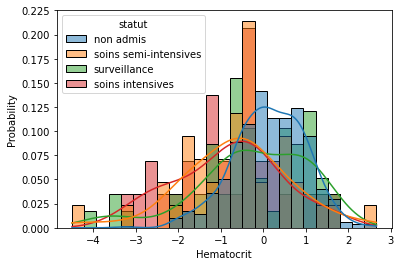

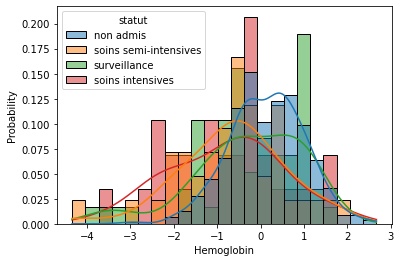

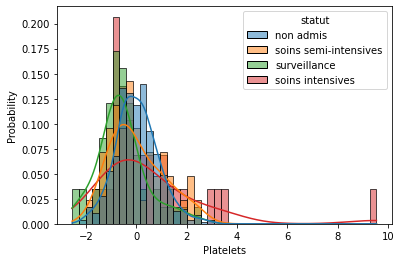

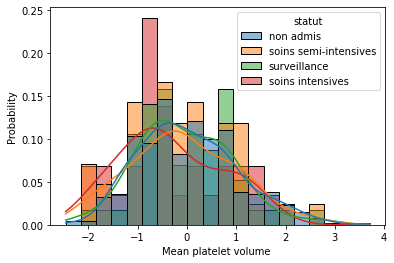

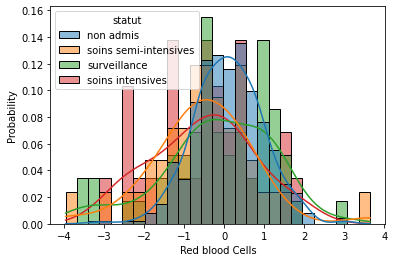

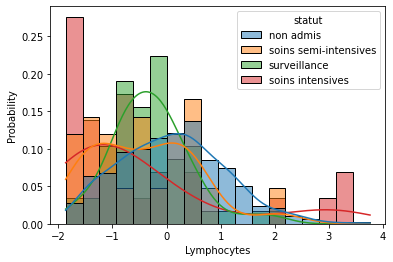

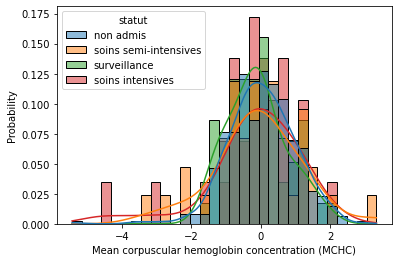

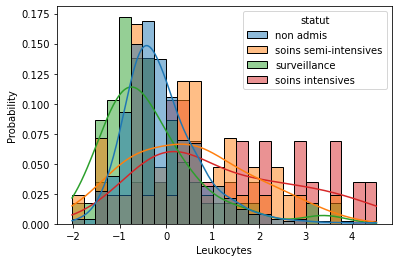

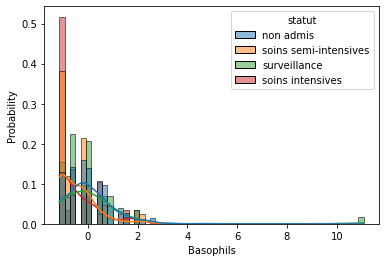

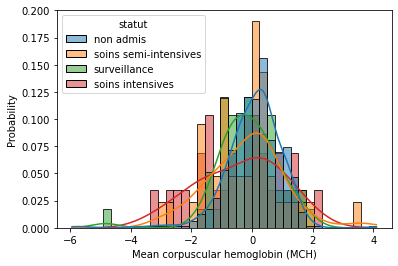

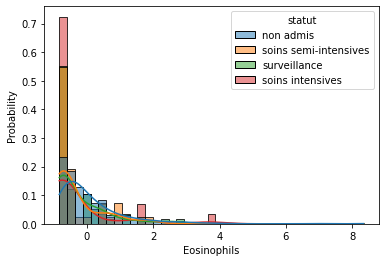

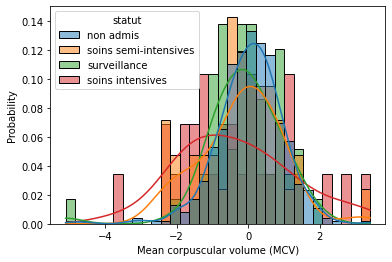

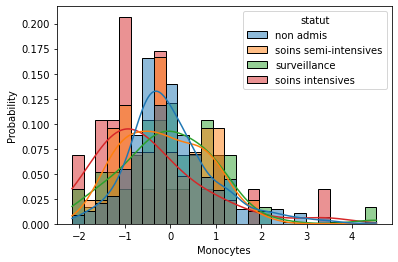

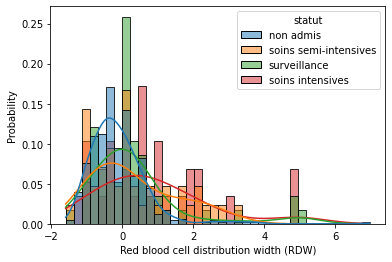

In [46]:
for i in sang_col:
  plt.figure()
  sns.histplot(data = data,x= i , hue= "statut",stat='probability', kde=True, common_norm=False  ) 


In [64]:
# valeurs manquantes
# si on efface toutes les patients ayant au moins une valeur manquante, notre base de données contiendrai uniquement 99 patients
data.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [68]:
# on compte les valeurs non manquantes par varible
data.count()

Patient age quantile                                     5644
SARS-Cov-2 exam result                                   5644
Patient addmited to regular ward (1=yes, 0=no)           5644
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644
Patient addmited to intensive care unit (1=yes, 0=no)    5644
Hematocrit                                                603
Hemoglobin                                                603
Platelets                                                 602
Mean platelet volume                                      599
Red blood Cells                                           602
Lymphocytes                                               602
Mean corpuscular hemoglobin concentration (MCHC)          602
Leukocytes                                                602
Basophils                                                 602
Mean corpuscular hemoglobin (MCH)                         602
Eosinophils                                               602
Mean cor

In [70]:
# les patients n'ayant aucune valeurs manquantes parmi ses caractéristiques sanguines sont :
data[sang_col].dropna().count()


Hematocrit                                          598
Hemoglobin                                          598
Platelets                                           598
Mean platelet volume                                598
Red blood Cells                                     598
Lymphocytes                                         598
Mean corpuscular hemoglobin concentration (MCHC)    598
Leukocytes                                          598
Basophils                                           598
Mean corpuscular hemoglobin (MCH)                   598
Eosinophils                                         598
Mean corpuscular volume (MCV)                       598
Monocytes                                           598
Red blood cell distribution width (RDW)             598
dtype: int64

In [71]:
# les patients n'ayant aucune valeurs manquantes parmi ses caractéristiques virales sont : 
data[maladie_col].dropna().count()

Respiratory Syncytial Virus    265
Influenza A                    265
Influenza B                    265
Parainfluenza 1                265
CoronavirusNL63                265
Rhinovirus/Enterovirus         265
Coronavirus HKU1               265
Parainfluenza 3                265
Chlamydophila pneumoniae       265
Adenovirus                     265
Parainfluenza 4                265
Coronavirus229E                265
CoronavirusOC43                265
Inf A H1N1 2009                265
Bordetella pertussis           265
Metapneumovirus                265
Influenza B, rapid test        265
Influenza A, rapid test        265
dtype: int64

In [59]:
%pip install scipy

import scipy
import scipy.stats as stats


In [76]:
# Test d'hypothèse

# création d'une base de données contenant uniquement les patients atteints de covid-19

data_positive = data[data['SARS-Cov-2 exam result'] == 'positive']
data_negative = data[data['SARS-Cov-2 exam result'] == 'negative']

print(data_positive.shape)
print(data_negative.shape)


(558, 39)
(5086, 39)


In [149]:
# Test d'hypothèse 
def test_stat(data_positive, data_negative, alpha):
  for i in sang_col :
    #print(str(i)+" : ")
    #print("positive : " + str(data_positive[i].dropna().count())); print("negative : "+ str(data_negative[i].dropna().count()))

    a= data_positive[i].dropna(); b= data_negative[i].dropna()
    if stats.ttest_ind( a, b.sample(a.shape[0]) ).pvalue < alpha: 
      print(str(i)+"--------------------------------"+"Ho rejetée")
    else :
      print("Ho acceptée")
    #print('\n')



In [154]:
# resultats
test_stat(data_positive, data_negative, alpha= 0.02)

Ho acceptée
Ho acceptée
Platelets--------------------------------Ho rejetée
Mean platelet volume --------------------------------Ho rejetée
Red blood Cells--------------------------------Ho rejetée
Ho acceptée
Ho acceptée
Leukocytes--------------------------------Ho rejetée
Ho acceptée
Ho acceptée
Eosinophils--------------------------------Ho rejetée
Ho acceptée
Monocytes--------------------------------Ho rejetée
Ho acceptée
